In [185]:
import numpy as np
import xgboost as xgb
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.datasets import load_breast_cancer

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



df = pd.read_csv('ES_1D_20240310_2.csv')
df = df.iloc[200:]
df = df.dropna()
X = df.iloc[:, 6:-1]
y = df.iloc[:, -1]




# Split the dataset into 60% training, 20% validation, and 20% test sets
#X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
#X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=21)  # 0.25 x 0.8 = 0.2

# Determine split indices
total_rows = X.shape[0]
train_end = int(total_rows * 0.7)
val_end = int(total_rows * 0.85)

# Split the dataset into training, validation, and test sets based on calculated indices
X_train, y_train = X.iloc[:train_end], y.iloc[:train_end]
X_val, y_val = X.iloc[train_end:val_end], y.iloc[train_end:val_end]
X_test, y_test = X.iloc[val_end:], y.iloc[val_end:]

# Convert training, validation, and test sets to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)


# Number of boosting rounds
num_boost_round = 15


In [87]:
y

200     0.0
201     0.0
202     0.0
203     1.0
204     0.0
       ... 
2919    0.0
2920    0.0
2921    1.0
2922    0.0
2923    0.0
Name: Target_goingUp, Length: 2724, dtype: float64

In [192]:
# Train the model
params = {
    # Your other parameters here
    'alpha': 2,  # L1 regularization term on weights
    'lambda': 0.1,  # L2 regularization term on weights
    'max_depth' : 13,
    'scale_pos_weight': 0.9,
    'objective': 'binary:logistic',  # Use logistic regression for binary classification
    'eval_metric': 'logloss',  # Evaluation metric for validation data
    'gamma' : 0.5
}

bst = xgb.train(params, dtrain, num_boost_round, evals=[(dval, "Validation")], early_stopping_rounds=50)


[0]	Validation-logloss:0.63833
[1]	Validation-logloss:0.61879
[2]	Validation-logloss:0.60836
[3]	Validation-logloss:0.61139
[4]	Validation-logloss:0.60427
[5]	Validation-logloss:0.59947
[6]	Validation-logloss:0.60180
[7]	Validation-logloss:0.60546
[8]	Validation-logloss:0.60702
[9]	Validation-logloss:0.60890
[10]	Validation-logloss:0.61180
[11]	Validation-logloss:0.60831
[12]	Validation-logloss:0.60990
[13]	Validation-logloss:0.60990
[14]	Validation-logloss:0.60990


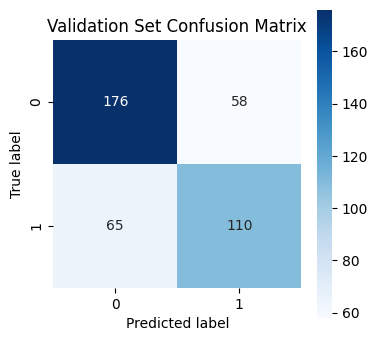


### Validation Set Evaluation ###
Confusion Matrix:
 [[176  58]
 [ 65 110]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.73      0.75      0.74       234
         1.0       0.65      0.63      0.64       175

    accuracy                           0.70       409
   macro avg       0.69      0.69      0.69       409
weighted avg       0.70      0.70      0.70       409



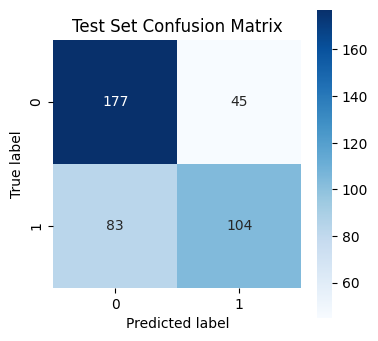


### Test Set Evaluation ###
Confusion Matrix:
 [[177  45]
 [ 83 104]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.68      0.80      0.73       222
         1.0       0.70      0.56      0.62       187

    accuracy                           0.69       409
   macro avg       0.69      0.68      0.68       409
weighted avg       0.69      0.69      0.68       409



In [193]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    # Calculate confusion matrix
    matrix = confusion_matrix(y_true, y_pred)
    # Create a heatmap
    plt.figure(figsize=(4,4 ))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', square=True)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(title)
    plt.show()


# Predictions and evaluations for validation set
y_val_pred_prob = bst.predict(dval)
y_val_pred = y_val_pred_prob > 0.5
# Plotting confusion matrix for validation set
plot_confusion_matrix(y_val, y_val_pred, title='Validation Set Confusion Matrix')
# Evaluation on the validation set
print("\n### Validation Set Evaluation ###")
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))



# Predictions and evaluations for test set
y_test_pred_prob = bst.predict(dtest)
y_test_pred = y_test_pred_prob > 0.5
# Plotting confusion matrix for test set
plot_confusion_matrix(y_test, y_test_pred, title='Test Set Confusion Matrix')

# Evaluation on the test set
print("\n### Test Set Evaluation ###")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

